In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('precision', 4)
pd.set_option('display.max_columns', None)
np.set_printoptions(precision=3)

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')

In [2]:
fpath = '/content/drive/MyDrive/Data Analysis/Payment Prediction/dataset.csv'
df = pd.read_csv(fpath, index_col=0)
df.head()

,iduser,mdutype,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
0,10100018739106,NaN,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,12.0,0.0,0.0,3504812.0,0.0,0.0,3504812.0
1,10100037810674,NaN,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,17123098.0,0.0,0.0,17123098.0
2,10100036273719,NaN,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.0,0.0,2234363.0,0.0,0.0,2234363.0
3,10100027752244,NaN,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,2.0,0.0,602361.0,210114.0,0.0,812475.0
4,10100000624840,NaN,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum()

iduser                0
mdutype          190672
group                 0
viewCount         34631
editCount         34631
shareCount        34631
searchCount       34631
coworkCount       34631
add              136834
del              136834
move             136834
rename           136834
adddir           136834
movedir          136834
visdays           15694
openCount         50910
saveCount         50910
exportCount       50910
viewTraffic       50910
editTraffic       50910
exportTraffic     50910
traffic           50910
dtype: int64

## 1. 도메인 지식을 활용한 데이터 특징에 대한 이해

- iduser: 식별값
- group: 결제(mdu) vs 비결제(sdu) 정보
- viewCount: 보기 횟수
- editCount: 편집 횟수
- shareCount: 공유 횟수
- searchCount: 검색 횟수
- coworkCount: 공동작업 횟수
- add: 파일 추가 횟수
- del: 파일 삭제 횟수
- move: 파일 이동 횟수
- rename: 파일명 변경 횟수
- adddir: 폴더 생성
- movedir: 폴더 이동
- visdays: 방문일수
- openCount: 열기 횟수
- saveCount: 저장 횟수
- exportCount: 내보내기 횟수
- viewTraffic: 보기 용량(파일 사이즈)
- editTraffic: 편집 용량
- exportTraffic: 내보내기 용량
- traffic: 전체 용량

In [ ]:
# 유저의 행동과 관련된 특징 / 파일 크기와 관련된 특징들로 이뤄져있다.
# 결제 여부를 판단하는 특징들이 모두 연속형 변수이다.

# 유저의 특정 행동
# [view / edit / share / search / cowork] Count
# [add / del / move / rename / adddir / movedir]
# [open / save / export] count
# visdays

# 파일 관련 특징
# [view / edit / export] Traffic
# traffic

### 1.1 결제 예측에 불필요한 변수 삭제

In [4]:
# 결제 예측에 불필요한 변수는 삭제한다.
# iduser, mdutype
drop_cols = ['iduser', 'mdutype']
df.drop(drop_cols, axis=1, inplace=True)
df.head()

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
0,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,12.0,0.0,0.0,3504812.0,0.0,0.0,3504812.0
1,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,17123098.0,0.0,0.0,17123098.0
2,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.0,0.0,2234363.0,0.0,0.0,2234363.0
3,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,2.0,0.0,602361.0,210114.0,0.0,812475.0
4,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 데이터 탐색 전 Train, Test 분리

In [5]:
from sklearn.model_selection import train_test_split

x = df.drop(['group'], axis=1)
y = df['group']
train_x, test_x, train_y, test_y = train_test_split(x, y)

print(train_x.shape, test_x.shape)
print(train_y.shape, test_y.shape)

(150000, 19) (50000, 19)
(150000,) (50000,)


In [6]:
train_y.replace({'sdu':0, 'mdu':1}, inplace=True)
test_y.replace({'sdu':0, 'mdu':1}, inplace=True)

train_y.value_counts()

0    143018
1      6982
Name: group, dtype: int64

## 2. 데이터 탐색

### 2.1 라벨 탐색

In [7]:
# sdu - 미결제 / mdu - 결제
train_y.value_counts(normalize=True)

0    0.953453
1    0.046547
Name: group, dtype: float64

In [8]:
train_y.value_counts()

0    143018
1      6982
Name: group, dtype: int64

In [ ]:
# (*) TODO. 미결제 데이터와 결제 데이터의 비율은 95.3(%) : 4.6(%)이다.
# 클래스 불균형 문제가 있기 때문에 이후에 모델을 학습시킬 때는 이 부분을 고려해야 한다.

### 2.2 변수 연속 / 범주형 및 결측치 확인

In [9]:
for column in train_x.columns:
    print(
        column, # Column 이름
        train_x[column].dtypes, # Column 타입
        train_x[column].isnull().sum(), # 해당 Column의 결측치 개수
        train_x[column].nunique(), # 해당 Column의 상태 공간 수
        train_x[column].unique()[:3], # 해당 Column의 데이터 일부
        sep=' / '
    )

viewCount / float64 / 25968 / 445 / [44. 65. 43.]
editCount / float64 / 25968 / 255 / [ 0. nan 77.]
shareCount / float64 / 25968 / 27 / [ 0. nan  1.]
searchCount / float64 / 25968 / 193 / [ 0. nan  1.]
coworkCount / float64 / 25968 / 16 / [ 0. nan  1.]
add / float64 / 102702 / 467 / [44. 53. 16.]
del / float64 / 102702 / 16 / [ 0. nan  1.]
move / float64 / 102702 / 46 / [ 0. nan  2.]
rename / float64 / 102702 / 73 / [ 0. nan  4.]
adddir / float64 / 102702 / 72 / [ 0. nan  1.]
movedir / float64 / 102702 / 12 / [ 0. nan  1.]
visdays / float64 / 11770 / 30 / [17. 10.  2.]
openCount / float64 / 38118 / 426 / [44. 65. nan]
saveCount / float64 / 38118 / 280 / [ 0. nan 78.]
exportCount / float64 / 38118 / 19 / [ 0. nan  1.]
viewTraffic / float64 / 38118 / 107458 / [9.288e+07 1.241e+08       nan]
editTraffic / float64 / 38118 / 26596 / [      0.      nan 2551317.]
exportTraffic / float64 / 38118 / 138 / [      0.      nan 1712892.]
traffic / float64 / 38118 / 108087 / [9.288e+07 1.241e+08     

In [ ]:
# 모든 데이터가 Type이 float이다.
# 그리고, 모든 데이터가 결측치를 포함하고 있으며, 일부는 50% 이상의 결측치를 가지고 있다.
# 상태 공간의 수와 Column의 성격을 고려할 때 모두 "연속형" 변수라고 판단한다. 현재 범주형 변수는 존재하지 않는다.

### 2.3 탐색을 위한 데이터 병합

In [10]:
train_df = pd.concat([train_x, train_y], axis=1)
train_df.head()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic,group
52936,44.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,17.0,44.0,0.0,0.0,92875290.0,0.0,0.0,92875290.0,0
182695,65.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,17.0,65.0,0.0,0.0,124101402.0,0.0,0.0,124101402.0,0
153189,43.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
158002,17.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,17.0,0.0,0.0,147087360.0,0.0,0.0,147087360.0,0
64481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### 2.4 연속형 변수 탐색

In [ ]:
# 결측치
# 이상치
# 특징간 상관관계
# 분포 확인 - 왜도, 스케일링

In [11]:
train_x.head()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
52936,44.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,17.0,44.0,0.0,0.0,92875290.0,0.0,0.0,92875290.0
182695,65.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,17.0,65.0,0.0,0.0,124101402.0,0.0,0.0,124101402.0
153189,43.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158002,17.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,17.0,0.0,0.0,147087360.0,0.0,0.0,147087360.0
64481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 'viewCount', 'editCount', 'shareCount', 'searchCount', 'coworkCount',
# 'add', 'del', 'move', 'rename', 'adddir', 'movedir', 'visdays',
# 'openCount', 'saveCount', 'exportCount', 'viewTraffic', 'editTraffic',
# 'exportTraffic', 'traffic'

# 유저의 행동
# [view / edit / share / search / cowork] Count # 파일 직접 행동 변수
# [open / save / export] count # 파일 간접 행동 변수 1
# [add / del / move / rename / adddir / movedir] # 파일 간접 행동 변수 2
# visdays

# 파일 특징
# [view / edit / export] Traffic,
# traffic(전체 용량)

In [12]:
train_df.head()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic,group
52936,44.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,17.0,44.0,0.0,0.0,92875290.0,0.0,0.0,92875290.0,0
182695,65.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,17.0,65.0,0.0,0.0,124101402.0,0.0,0.0,124101402.0,0
153189,43.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
158002,17.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,17.0,0.0,0.0,147087360.0,0.0,0.0,147087360.0,0
64481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


#### 파일 직접 행동 변수
* viewCount
* editCount
* shareCount
* searchCount
* coworkCount

In [13]:
col_list = ['viewCount', 'editCount', 'shareCount', 'searchCount', 'coworkCount']

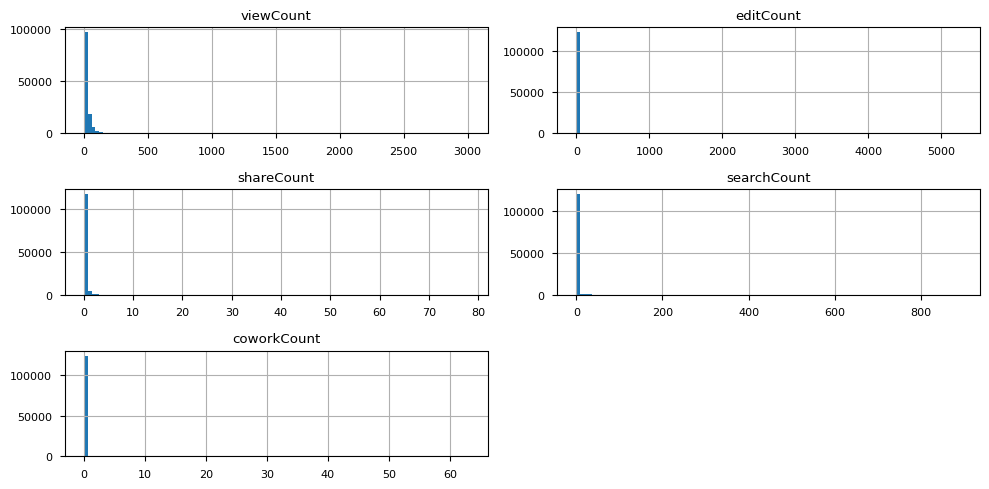

In [14]:
# 개별 Column 단위의 분포 살펴보기
train_df[col_list].hist(bins=100, figsize=(10, 5))
plt.tight_layout()

In [15]:
train_df[col_list].describe()

,viewCount,editCount,shareCount,searchCount,coworkCount
count,124032.000000,124032.000000,124032.000000,124032.000000,124032.000000
mean,24.480239,1.585986,0.075730,0.994695,0.003088
std,36.685815,21.221771,0.553116,8.956779,0.286628
min,2.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,0.000000,0.000000,0.000000,0.000000
max,3005.000000,5267.000000,78.000000,893.000000,63.000000


In [16]:
train_df[col_list].quantile(0.95)

viewCount      80.0
editCount       4.0
shareCount      0.0
searchCount     2.0
coworkCount     0.0
Name: 0.95, dtype: float64

In [17]:
train_df[col_list].quantile(0.99)

viewCount      156.0
editCount       35.0
shareCount       2.0
searchCount     25.0
coworkCount      0.0
Name: 0.99, dtype: float64

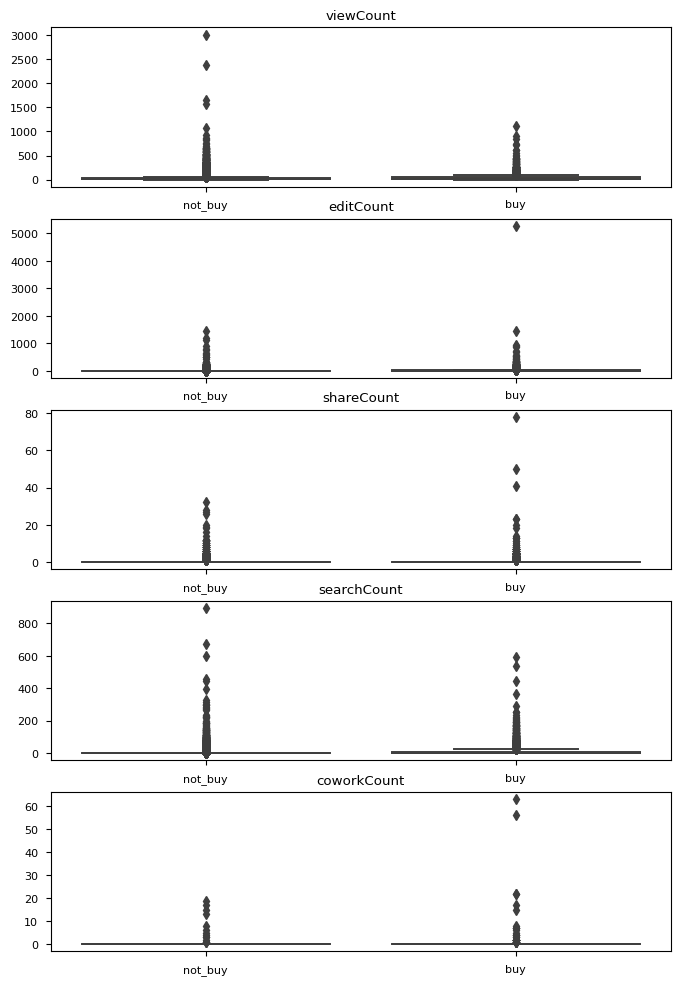

In [18]:
# boxplot을 통한 분포 확인
# 5개의 변수 모두를 살펴보면, 구매 / 미구매에 대한 분포 차이가 크게 보이지 않는다.
fig, axes = plt.subplots(5, 1, figsize=(8, 12))

for col, ax in zip(col_list, axes):
    buy = train_df.loc[train_df['group'] == 1, col]
    not_buy = train_df.loc[train_df['group'] == 0, col]

    sns.boxplot([not_buy, buy], ax=ax)
    ax.set_title(col)
    ax.set_xticks([0, 1], ['not_buy', 'buy'])

In [ ]:
# 결측치
# 이상치
# 특징간 상관관계
# 분포 확인 - 왜도

In [19]:
# 결측치
# 모든 Column이 약 17%의 결측치를 가지고 있다.
# 제거 / 대체 / 예측 중에 하나를 선택해서 결측치를 채워야 한다.
train_df[col_list].isnull().sum() / len(train_df)

viewCount      0.17312
editCount      0.17312
shareCount     0.17312
searchCount    0.17312
coworkCount    0.17312
dtype: float64

In [20]:
(train_x.corr().sum() - 1) / (len(train_x.columns) - 1)

viewCount        0.205186
editCount        0.111060
shareCount       0.070788
searchCount      0.083881
coworkCount      0.030134
add              0.092767
del              0.021742
move             0.086239
rename           0.005120
adddir           0.062835
movedir          0.036915
visdays          0.132496
openCount        0.203162
saveCount        0.144980
exportCount      0.050399
viewTraffic      0.097141
editTraffic      0.076247
exportTraffic    0.046681
traffic          0.103113
dtype: float64

In [ ]:
# 특징 간 상관계수가 낮은 편이다.
# 그래서 다른 특징을 이용해서 결측치 데이터를 추정하기 어렵다고 생각한다.
# Simple Imputer "Average"를 사용해서 대체한다.

In [21]:
# 이상치
# 파일 직접 행동 변수들의 분포를 살펴보면, 꼬리 부분이 이상치로 작용한다.
# 그래서 IQR / DBSCAN 을 고려하고 있다.
train_df[col_list].describe()

,viewCount,editCount,shareCount,searchCount,coworkCount
count,124032.000000,124032.000000,124032.000000,124032.000000,124032.000000
mean,24.480239,1.585986,0.075730,0.994695,0.003088
std,36.685815,21.221771,0.553116,8.956779,0.286628
min,2.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,0.000000,0.000000,0.000000,0.000000
max,3005.000000,5267.000000,78.000000,893.000000,63.000000


In [22]:
# 분포 확인 - 왜도
# 대부분 심하게 치우쳐 있다.
# 이후에 변환을 통해서 치우침을 줄여야 한다.
train_df[col_list].skew()

viewCount       12.945049
editCount      137.787777
shareCount      43.724323
searchCount     31.780226
coworkCount    162.879098
dtype: float64

In [ ]:
# 파일 직접 행동 변수
# viewCount
# editCount
# shareCount
# searchCount
# coworkCount

# 결측치 - Simple Imputer / Average를 사용해서 채운다.
# 이상치 - IQR / DBSCAN을 사용해서 판단한다.
# 분포 - 치우침이 심하기 때문에 분포를 변환해야 한다.

#### 파일 간접 행동 변수 1

* openCount
* saveCount
* exportCount

In [23]:
col_list = ['openCount', 'saveCount', 'exportCount']

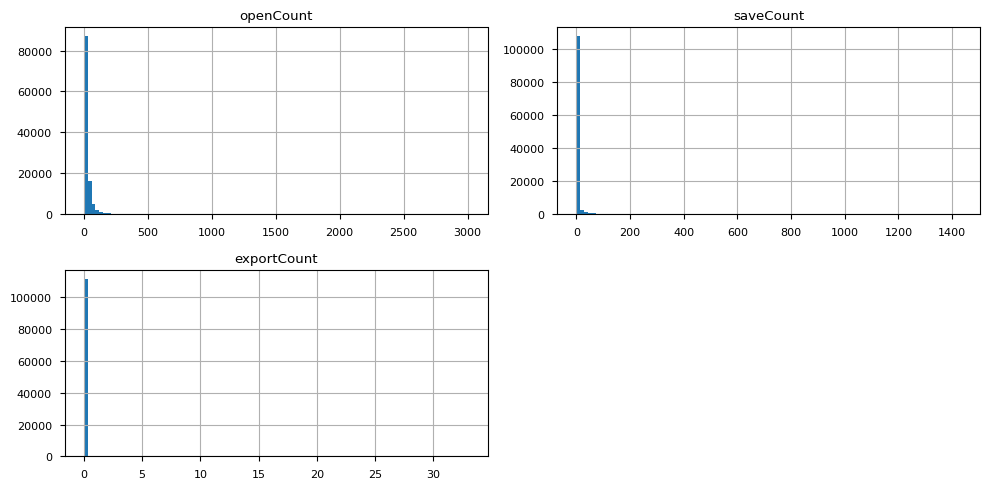

In [24]:
# 개별 Column 단위의 분포 살펴보기
# 파일 간접 행동 변수1에 대한 분포를 살펴본 결과 앞선 경우와 동일하게 치우침이 매우 심하다는 것을 알 수 있다.
train_df[col_list].hist(bins=100, figsize=(10, 5))
plt.tight_layout()

In [25]:
train_df[col_list].describe()

,openCount,saveCount,exportCount
count,111882.000000,111882.000000,111882.000000
mean,24.333995,2.667534,0.007410
std,36.635470,16.844017,0.243558
min,2.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000
50%,14.000000,0.000000,0.000000
75%,29.750000,1.000000,0.000000
max,3005.000000,1432.000000,33.000000


In [26]:
train_df[col_list].quantile(0.9)

openCount      55.0
saveCount       4.0
exportCount     0.0
Name: 0.9, dtype: float64

In [27]:
train_df[col_list].quantile(0.95)

openCount      79.0
saveCount      11.0
exportCount     0.0
Name: 0.95, dtype: float64

In [28]:
train_df[col_list].quantile(0.99)

openCount      154.0
saveCount       51.0
exportCount      0.0
Name: 0.99, dtype: float64

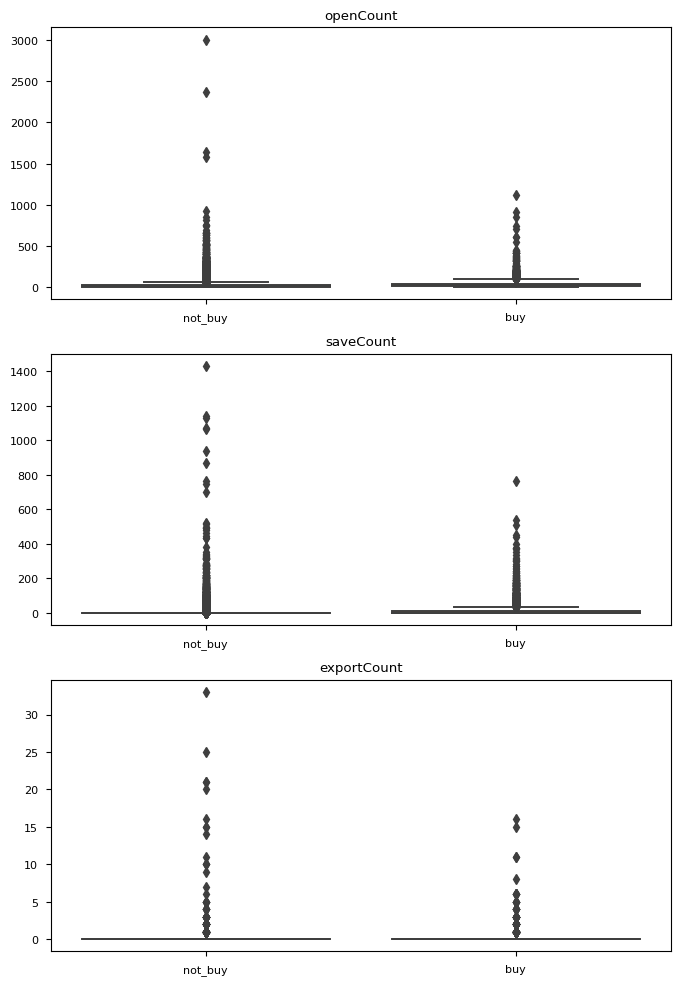

In [29]:
# Boxplot
# boxplot을 통한 분포 확인
# 3개의 변수 모두를 살펴보면, 구매 / 미구매에 대한 분포 차이가 크게 보이지 않는다.
fig, axes = plt.subplots(len(col_list), 1, figsize=(8, 12))

for col, ax in zip(col_list, axes):
    buy = train_df.loc[train_df['group'] == 1, col]
    not_buy = train_df.loc[train_df['group'] == 0, col]

    sns.boxplot([not_buy, buy], ax=ax)
    ax.set_title(col)
    ax.set_xticks([0, 1], ['not_buy', 'buy'])

In [ ]:
# 결측치
# 이상치
# 특징간 상관관계
# 분포 확인 - 왜도

In [30]:
train_df[col_list].isnull().sum()

openCount      38118
saveCount      38118
exportCount    38118
dtype: int64

In [31]:
train_df[col_list].isnull().sum() / len(train_df)

openCount      0.25412
saveCount      0.25412
exportCount    0.25412
dtype: float64

In [ ]:
# 결측치
# 앞선 파일 직접 행동 변수와 동일한 이유로 Simple Imputer / Avg를 사용하여 대체한다.

In [32]:
# 이상치
# 파일 직접 행동 변수들의 분포를 살펴보면, 꼬리 부분이 이상치로 작용한다.
# 그래서 IQR / DBSCAN 을 고려하고 있다.
train_df[col_list].describe()

,openCount,saveCount,exportCount
count,111882.000000,111882.000000,111882.000000
mean,24.333995,2.667534,0.007410
std,36.635470,16.844017,0.243558
min,2.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000
50%,14.000000,0.000000,0.000000
75%,29.750000,1.000000,0.000000
max,3005.000000,1432.000000,33.000000


In [33]:
# 분포 확인 - 왜도
# 대부분 심하게 치우쳐 있다.
# 이후에 변환을 통해서 치우침을 줄여야 한다.
train_df[col_list].skew()

openCount      13.675627
saveCount      29.471965
exportCount    69.692589
dtype: float64

In [ ]:
# 파일 간접 행동 변수 1
# openCount
# saveCount
# exportCount

# 결측치 - Simple Imputer / Average를 사용해서 채운다.
# 이상치 - IQR / DBSCAN을 사용해서 판단한다.
# 분포 - 치우침이 심하기 때문에 분포를 변환해야 한다.

#### 파일 간접 행동 변수 2

In [34]:
col_list = ['add', 'del', 'move', 'rename', 'adddir', 'movedir']

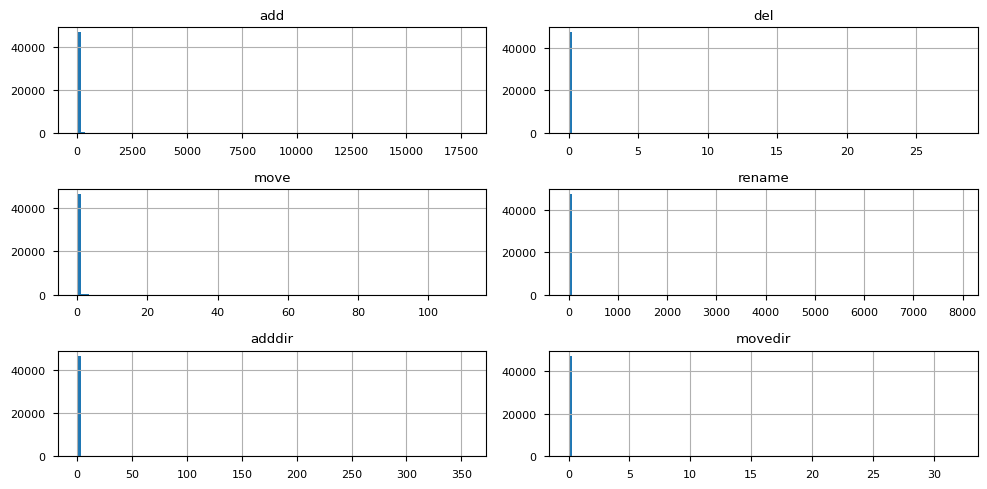

In [35]:
# 개별 Column 단위의 분포 살펴보기
# 파일 간접 행동 변수1에 대한 분포를 살펴본 결과 앞선 경우와 동일하게 치우침이 매우 심하다는 것을 알 수 있다.
train_df[col_list].hist(bins=100, figsize=(10, 5))
plt.tight_layout()

In [36]:
train_df[col_list].describe()

,add,del,move,rename,adddir,movedir
count,47298.000000,47298.000000,47298.000000,47298.000000,47298.000000,47298.000000
mean,31.435388,0.008732,0.116855,1.041291,0.380523,0.005983
std,173.170124,0.289333,1.508538,60.141294,3.293295,0.252241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17755.000000,28.000000,111.000000,7907.000000,355.000000,32.000000


In [37]:
train_df[col_list].quantile(0.9)

add        48.0
del         0.0
move        0.0
rename      0.0
adddir      1.0
movedir     0.0
Name: 0.9, dtype: float64

In [38]:
train_df[col_list].quantile(0.95)

add        69.0
del         0.0
move        0.0
rename      0.0
adddir      1.0
movedir     0.0
Name: 0.95, dtype: float64

In [39]:
train_df[col_list].quantile(0.99)

add        182.0
del          0.0
move         3.0
rename       4.0
adddir       4.0
movedir      0.0
Name: 0.99, dtype: float64

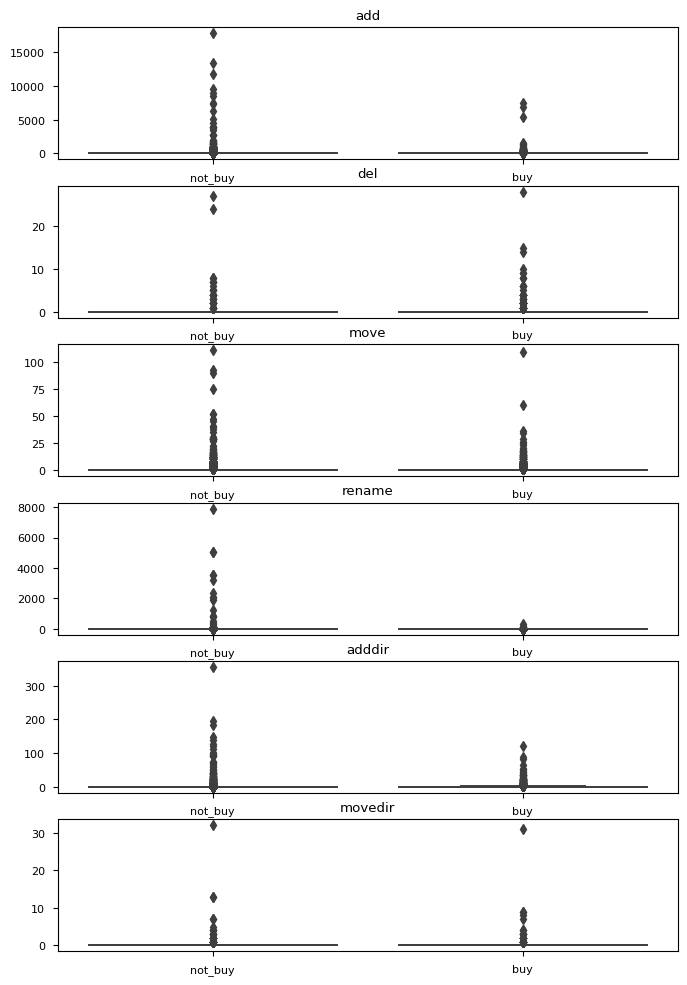

In [40]:
# Boxplot
# boxplot을 통한 분포 확인
# 3개의 변수 모두를 살펴보면, 구매 / 미구매에 대한 분포 차이가 크게 보이지 않는다.
fig, axes = plt.subplots(len(col_list), 1, figsize=(8, 12))

for col, ax in zip(col_list, axes):
    buy = train_df.loc[train_df['group'] == 1, col]
    not_buy = train_df.loc[train_df['group'] == 0, col]

    sns.boxplot([not_buy, buy], ax=ax)
    ax.set_title(col)
    ax.set_xticks([0, 1], ['not_buy', 'buy'])

In [ ]:
# 결측치
# 이상치
# 특징간 상관관계
# 분포 확인 - 왜도

In [41]:
# 결측치
train_df[col_list].isnull().sum()

add        102702
del        102702
move       102702
rename     102702
adddir     102702
movedir    102702
dtype: int64

In [42]:
train_df[col_list].isnull().sum() / len(train_df)

add        0.68468
del        0.68468
move       0.68468
rename     0.68468
adddir     0.68468
movedir    0.68468
dtype: float64

In [43]:
# 결측치가 68.39(%)이다.
# 해당 Column에 대해서는 제거 여부는 이후에 특징 선택에서 판단하기로 한다.
# 대체는 어렵다고 생각한다. 결측 : 결측X = 68 : 32이다.
# 32의 비율이 가진 값이 대표 값이라고 판단하기 어렵다. 그래서 대체를 진행하기에는 어려움이 있다.

In [44]:
# 그래서 결측 자체가 영향을 미치는지 판단을 해보도록 한다.
for col in col_list:
    train_df[f'{col}_NA'] = train_df[col].isnull().astype(int)

In [45]:
# 결측 여부는 구매 여부에 크게 영향을 미치지 않는다고 판단할 수 있다.
for col in col_list:
    print(train_df.groupby([f'{col}_NA'])['group'].mean(), end='\n\n')

add_NA
0    0.044103
1    0.047672
Name: group, dtype: float64

del_NA
0    0.044103
1    0.047672
Name: group, dtype: float64

move_NA
0    0.044103
1    0.047672
Name: group, dtype: float64

rename_NA
0    0.044103
1    0.047672
Name: group, dtype: float64

adddir_NA
0    0.044103
1    0.047672
Name: group, dtype: float64

movedir_NA
0    0.044103
1    0.047672
Name: group, dtype: float64



In [46]:
drop_col_list = [f'{col}_NA' for col in col_list]
train_df.drop(drop_col_list, axis=1, inplace=True)
train_df.head()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic,group
52936,44.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,17.0,44.0,0.0,0.0,92875290.0,0.0,0.0,92875290.0,0
182695,65.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,17.0,65.0,0.0,0.0,124101402.0,0.0,0.0,124101402.0,0
153189,43.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
158002,17.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,17.0,0.0,0.0,147087360.0,0.0,0.0,147087360.0,0
64481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [47]:
# 앞선 파일 직접 / 간접 행동 변수의 분포를 보면서 대부분의 데이터가 몰려있는 분포를 띄고 있다.
# 그래서 위험한 가정이지만, 파일 간접 행동 변수 2에 대해서도 결측치가 아닌 데이터들의 평균으로 대체하려 한다.

In [48]:
# 이상치
# 파일 직접 행동 변수들의 분포를 살펴보면, 꼬리 부분이 이상치로 작용한다.
# 그래서 IQR / DBSCAN 을 고려하고 있다.
train_df[col_list].describe()

,add,del,move,rename,adddir,movedir
count,47298.000000,47298.000000,47298.000000,47298.000000,47298.000000,47298.000000
mean,31.435388,0.008732,0.116855,1.041291,0.380523,0.005983
std,173.170124,0.289333,1.508538,60.141294,3.293295,0.252241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17755.000000,28.000000,111.000000,7907.000000,355.000000,32.000000


In [49]:
# 분포 확인 - 왜도
# 대부분 심하게 치우쳐 있다.
# 이후에 변환을 통해서 치우침을 줄여야 한다.
train_df[col_list].skew()

add        58.358543
del        61.546202
move       38.323072
rename     89.067577
adddir     49.004416
movedir    93.253315
dtype: float64

In [50]:
# 파일 간접 행동 변수 2
# add
# del
# move
# rename
# adddir
# movedir

# 결측치 - Simple Imputer / Average를 사용해서 채운다.
# 이상치 - IQR / DBSCAN을 사용해서 판단한다.
# 분포 - 치우침이 심하기 때문에 분포를 변환해야 한다.

#### visdays

In [51]:
col_list = ['visdays']

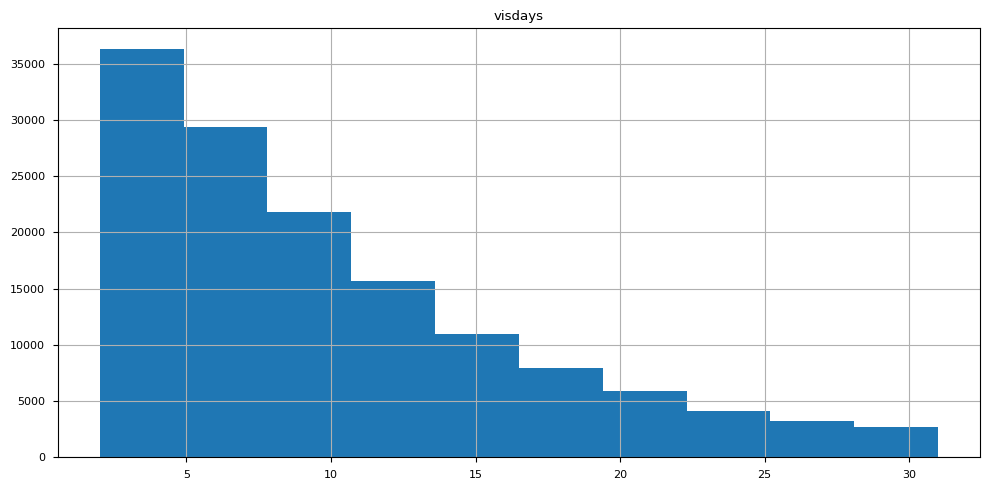

In [52]:
# 개별 Column 단위의 분포 살펴보기
# 방문일이 갈수록 적어지는 분포를 띄고 있다.
train_df[col_list].hist(figsize=(10, 5))
plt.tight_layout()

In [53]:
train_df[col_list].describe()

,visdays
count,138230.000000
mean,9.855849
std,6.984586
min,2.000000
25%,4.000000
50%,8.000000
75%,14.000000
max,31.000000


([<matplotlib.axis.XTick at 0x799e237f4eb0>,
 [Text(0, 0, 'not_buy'), Text(1, 0, 'buy')])

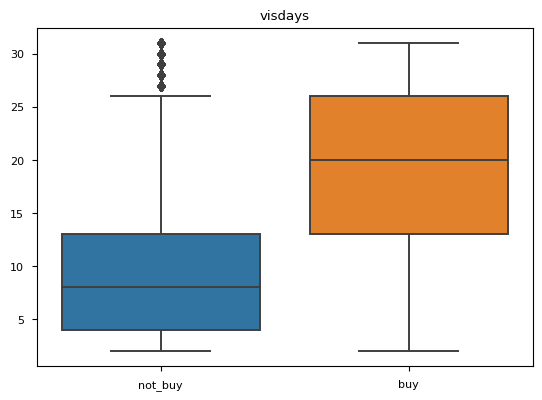

In [54]:
# Boxplot
# boxplot을 통한 분포 확인
# visdays는 구매 여부에 따른 데이터 분포가 달라지는 것을 확인할 수 있다.
# 방문일이 많은 고객일수록 구매 경향이 높게 나타나는 것을 확인할 수 있다.
# 그래서 구매 예측에 중요한 변수이다.

buy = train_df.loc[train_df['group'] == 1, 'visdays']
not_buy = train_df.loc[train_df['group'] == 0, 'visdays']

sns.boxplot([not_buy, buy])
plt.title('visdays')
plt.xticks([0, 1], ['not_buy', 'buy'])

In [55]:
# 결측치
# 이상치
# 특징간 상관관계
# 분포 확인 - 왜도

In [56]:
# 결측치
train_df[col_list].isnull().sum() / len(train_df)

visdays    0.078467
dtype: float64

In [57]:
# 결측치는 전체 데이터 기준으로 7.8(%)이다.
# 그래서 결측치가 아닌 데이터들의 평균값으로 대체하려 한다.

In [58]:
# 이상치
train_df[col_list].describe()

,visdays
count,138230.000000
mean,9.855849
std,6.984586
min,2.000000
25%,4.000000
50%,8.000000
75%,14.000000
max,31.000000


In [59]:
# 분포 확인 - 왜도
# 앞선 분포와 왜도 확인을 해본 결과, 데이터의 치우침이 크게 나타나지 않는다.
# 그래서 visdays는 별도의 변환을 진행하지는 않는다.
train_df[col_list].skew()

visdays    1.064929
dtype: float64

#### 파일 특징
* viewTraffic
* editTraffic
* exportTraffic
* traffic

In [60]:
col_list = ['viewTraffic', 'editTraffic', 'exportTraffic', 'traffic']

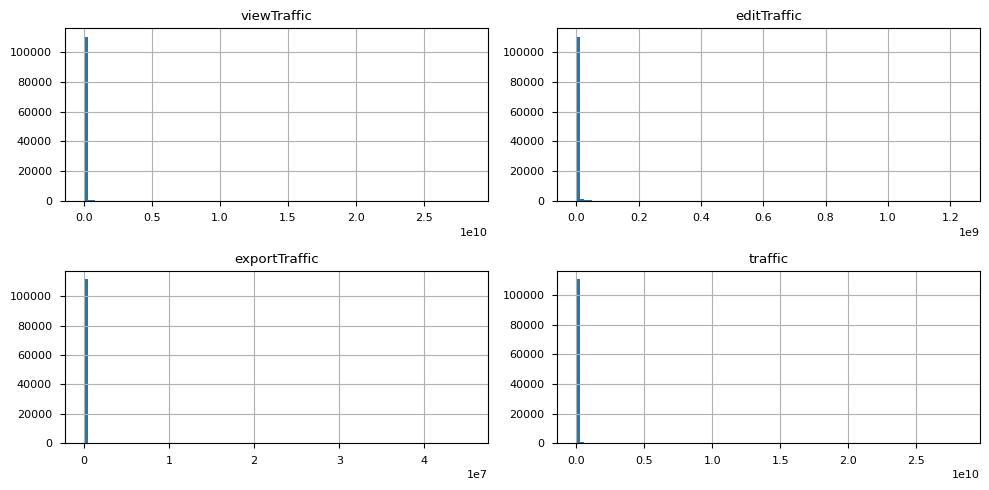

In [61]:
# 개별 Column 단위의 분포 살펴보기
# 파일 특징에 대한 분포를 살펴본 결과 앞선 경우와 동일하게 치우침이 매우 심하다는 것을 알 수 있다.
train_df[col_list].hist(bins=100, figsize=(10, 5))
plt.tight_layout()

In [62]:
train_df[col_list].describe()

,viewTraffic,editTraffic,exportTraffic,traffic
count,1.118820e+05,1.118820e+05,1.118820e+05,1.118820e+05
mean,2.584391e+07,7.176216e+05,2.324855e+03,2.656385e+07
std,1.531047e+08,8.431554e+06,1.710334e+05,1.544467e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.166424e+06,0.000000e+00,0.000000e+00,1.250834e+06
50%,5.610984e+06,0.000000e+00,0.000000e+00,5.824278e+06
75%,1.997355e+07,1.473350e+04,0.000000e+00,2.069385e+07
max,2.826016e+10,1.233858e+09,4.514945e+07,2.826016e+10


In [63]:
train_df[col_list].quantile(0.9)

viewTraffic      53893977.6
editTraffic        466284.5
exportTraffic           0.0
traffic          55428771.9
Name: 0.9, dtype: float64

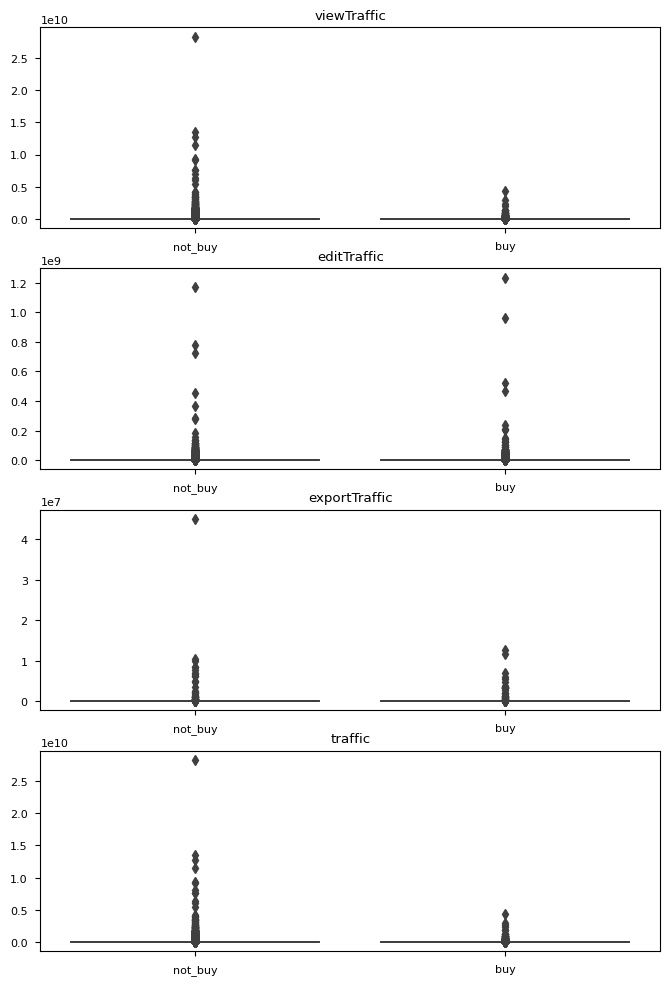

In [64]:
# Boxplot
# boxplot을 통한 분포 확인
# 4개의 변수 모두를 살펴보면, 구매 / 미구매에 대한 분포 차이가 크게 보이지 않는다.
fig, axes = plt.subplots(len(col_list), 1, figsize=(8, 12))

for col, ax in zip(col_list, axes):
    buy = train_df.loc[train_df['group'] == 1, col]
    not_buy = train_df.loc[train_df['group'] == 0, col]

    sns.boxplot([not_buy, buy], ax=ax)
    ax.set_title(col)
    ax.set_xticks([0, 1], ['not_buy', 'buy'])

In [65]:
# 결측치
# 이상치
# 특징간 상관관계
# 분포 확인 - 왜도

In [66]:
# 결측치
train_df[col_list].isnull().sum() / len(train_df)

viewTraffic      0.25412
editTraffic      0.25412
exportTraffic    0.25412
traffic          0.25412
dtype: float64

In [67]:
# 결측치
# 앞선 파일 직접 행동 변수와 동일한 이유로 Simple Imputer / Avg를 사용하여 대체한다.

In [68]:
# 이상치
# 파일 직접 행동 변수들의 분포를 살펴보면, 꼬리 부분이 이상치로 작용한다.
# 그래서 IQR / DBSCAN 을 고려하고 있다.
train_df[col_list].describe()

,viewTraffic,editTraffic,exportTraffic,traffic
count,1.118820e+05,1.118820e+05,1.118820e+05,1.118820e+05
mean,2.584391e+07,7.176216e+05,2.324855e+03,2.656385e+07
std,1.531047e+08,8.431554e+06,1.710334e+05,1.544467e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.166424e+06,0.000000e+00,0.000000e+00,1.250834e+06
50%,5.610984e+06,0.000000e+00,0.000000e+00,5.824278e+06
75%,1.997355e+07,1.473350e+04,0.000000e+00,2.069385e+07
max,2.826016e+10,1.233858e+09,4.514945e+07,2.826016e+10


In [69]:
# 분포 확인 - 왜도
# 대부분 심하게 치우쳐 있다.
# 이후에 변환을 통해서 치우침을 줄여야 한다.
train_df[col_list].skew()

viewTraffic       83.287714
editTraffic       86.506011
exportTraffic    182.332430
traffic           81.710844
dtype: float64

In [70]:
# 파일 간접 행동 변수 2
# viewTraffic
# editTraffic
# exportTraffic
# traffic

# 결측치 - Simple Imputer / Average를 사용해서 채운다.
# 이상치 - IQR / DBSCAN을 사용해서 판단한다.
# 분포 - 치우침이 심하기 때문에 분포를 변환해야 한다.

#### 연속형 변수 탐색 결과 정리

In [ ]:
# 파일 직접 행동 변수
# viewCount
# editCount
# shareCount
# searchCount
# coworkCount

# 결측치 - Simple Imputer / Average를 사용해서 채운다.
# 이상치 - IQR / DBSCAN을 사용해서 판단한다.
# 분포 - 치우침이 심하기 때문에 분포를 변환해야 한다.

In [ ]:
# 파일 간접 행동 변수 1
# openCount
# saveCount
# exportCount

# 결측치 - Simple Imputer / Average를 사용해서 채운다.
# 이상치 - IQR / DBSCAN을 사용해서 판단한다.
# 분포 - 치우침이 심하기 때문에 분포를 변환해야 한다.

In [ ]:
# 파일 간접 행동 변수 2
# add
# del
# move
# rename
# adddir
# movedir

# 결측치 - Simple Imputer / Average를 사용해서 채운다.
# 이상치 - IQR / DBSCAN을 사용해서 판단한다.
# 분포 - 치우침이 심하기 때문에 분포를 변환해야 한다.

In [ ]:
# visdays

# 결측치 - Simple Imputer / Average를 사용해서 채운다.

In [ ]:
# 파일 간접 행동 변수 2
# viewTraffic
# editTraffic
# exportTraffic
# traffic

# 결측치 - Simple Imputer / Average를 사용해서 채운다.
# 이상치 - IQR / DBSCAN을 사용해서 판단한다.
# 분포 - 치우침이 심하기 때문에 분포를 변환해야 한다.

* 모든 변수에 대해 결측치는 Simple Imputer / Average를 사용해서 채운다.
* visdays를 제외한 모든 변수는 이상치에 대한 판단을 IQR / DBSCAN을 사용해서 판단한다.
* visdays를 제외한 모든 변수는 치우침이 심하기 때문에 분포를 변환해야 한다.

In [74]:
train_x.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
train_df = pd.concat([train_x, train_y], axis=1)
train_df.head()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic,group
0,44.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,17.0,44.0,0.0,0.0,92875290.0,0.0,0.0,92875290.0,0
1,65.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,17.0,65.0,0.0,0.0,124101402.0,0.0,0.0,124101402.0,0
2,43.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,17.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,17.0,0.0,0.0,147087360.0,0.0,0.0,147087360.0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## 3. 전처리

* 결측치
* 이상치 확인
* 변수 치우침 제거
* 스케일링 진행

In [75]:
train_x = train_df.drop(['group'], axis=1)
train_y = train_df['group']

### 3.1 결측치 처리

In [76]:
# 앞선 데이터 탐색을 통해 결측이 아닌 데이터에서 이상치가 매우 크게 나타난 것을 확인했다.
# 결측치가 아닌 데이터들에 대해서 단순 평균을 적용하기에는 문제가 있을거라 생각했다.
# 그래서 결측 / 결측 X 데이터를 구분하고 이상치를 배제하고, 각 Column별 적용할 값을 별도로 설정한다.

def IQR_rule(val_list, w=1.5):
    Q1 = np.quantile(val_list, 0.25)
    Q3 = np.quantile(val_list, 0.75)
    IQR = Q3 - Q1

    not_outlier_cond = (Q3 + w * IQR >= val_list) & (Q1 - w * IQR <= val_list)
    return not_outlier_cond

In [77]:
replace_dict = dict()

for col in train_x.columns:
    temp_df = train_x[[col]]
    temp_df_not_na = temp_df[temp_df[col].notnull()]
    not_outlier_cond = temp_df_not_na.apply(IQR_rule, axis=0)
    replace_dict[col] = temp_df_not_na[not_outlier_cond[col]].mean()[col]

# train / test data 결측치 처리
for col in train_x.columns:
    replace_value = replace_dict[col]
    train_x[col].fillna(replace_value, inplace=True)
    test_x[col].fillna(replace_value, inplace=True)

In [78]:
train_x.isnull().sum()

viewCount        0
editCount        0
shareCount       0
searchCount      0
coworkCount      0
add              0
del              0
move             0
rename           0
adddir           0
movedir          0
visdays          0
openCount        0
saveCount        0
exportCount      0
viewTraffic      0
editTraffic      0
exportTraffic    0
traffic          0
dtype: int64

In [79]:
test_x.isnull().sum()

viewCount        0
editCount        0
shareCount       0
searchCount      0
coworkCount      0
add              0
del              0
move             0
rename           0
adddir           0
movedir          0
visdays          0
openCount        0
saveCount        0
exportCount      0
viewTraffic      0
editTraffic      0
exportTraffic    0
traffic          0
dtype: int64

### 3.2 이상치 처리

In [ ]:
# IQR을 이용해서 이상치를 판단하면, 절반 가까이 되는 데이터가 사라져야 한다.
# 또한 대부분의 데이터가 치우침이 심한 상태이기 때문에 IQR보다 Z-Score를 사용해서 이상치를 판단한다.

In [80]:
from scipy.stats import zscore

# z-score를 3으로 설정하면, 이상치를 판단하는 데이터의 비율이 5.56%가 된다.
not_outlier_cond = (np.abs(zscore(train_x)) < 3).sum(axis=1) == len(train_x.columns)
not_outlier_ratio = (len(not_outlier_cond) - not_outlier_cond.sum()) / len(not_outlier_cond)
not_outlier_ratio

0.0556

In [81]:
train_x = train_x[not_outlier_cond]
train_y = train_y[not_outlier_cond]

print(train_x.shape, train_y.shape)

(141660, 19) (141660,)


### 3.3 변수 치우침 제거

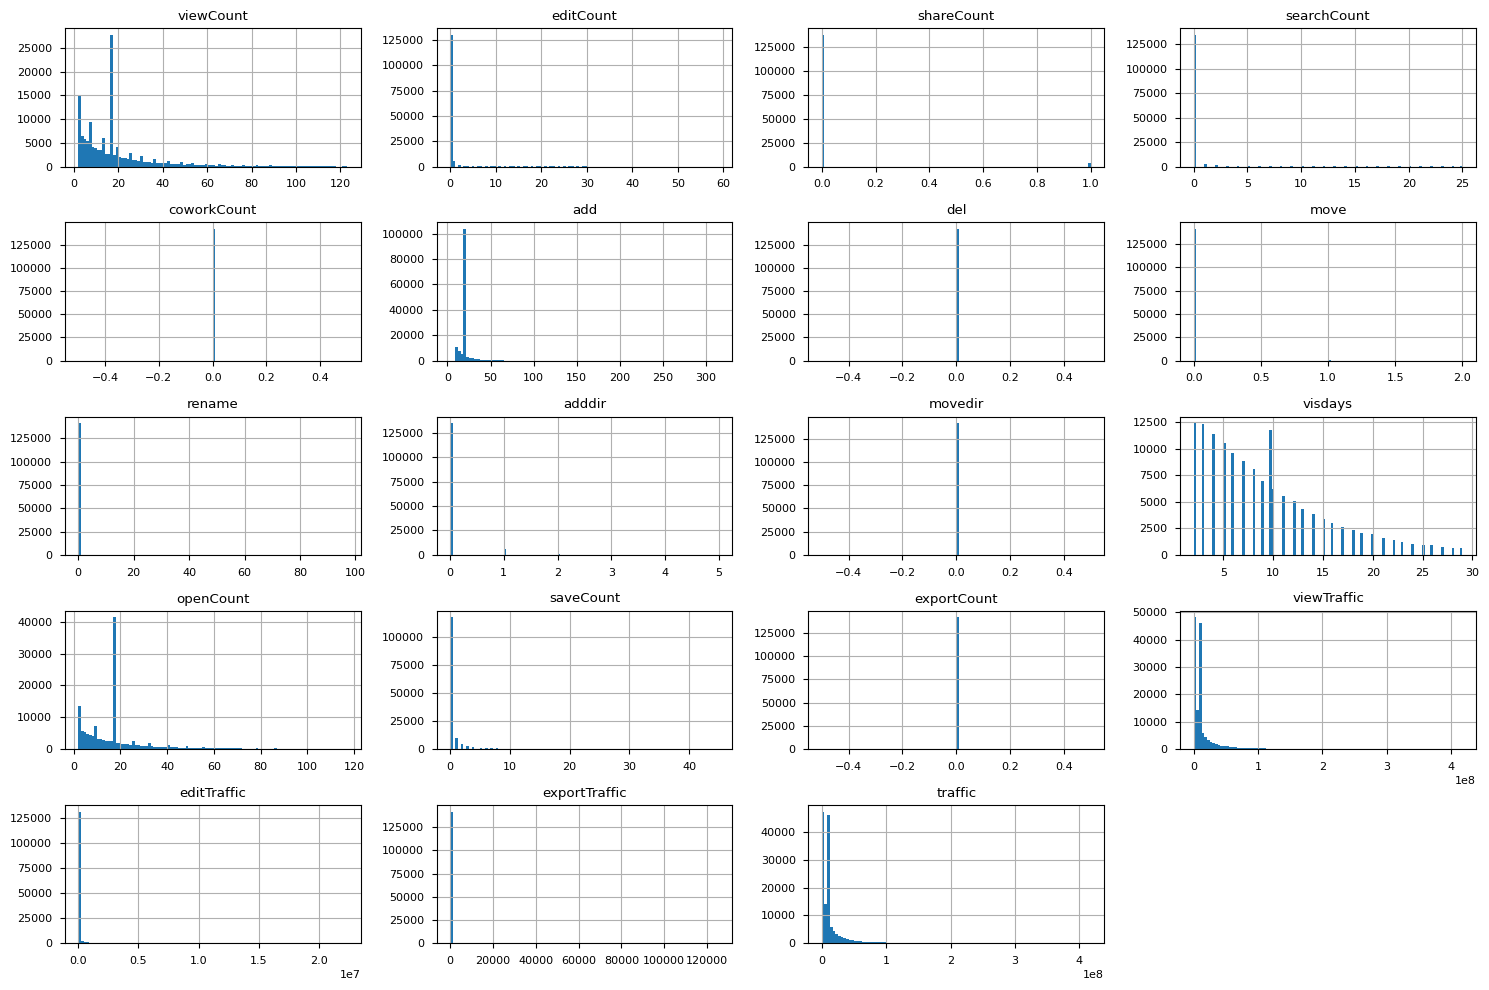

In [82]:
train_x.hist(bins=100, figsize=(15, 10))
plt.tight_layout()

In [ ]:
# editcount, sharecount, searchcount, coworkcount, del
# move, rename, adddir, movedir, savecount,
# exportcount, edittraffic, exporttraffic

In [83]:
biased_cols = [
    'editCount', 'shareCount', 'searchCount', 'coworkCount',
    'del', 'move', 'rename', 'adddir', 'movedir',
    'saveCount', 'exportCount', 'editTraffic', 'exportTraffic']

In [84]:
train_df = pd.concat([train_x, train_y], axis=1)
test_df = pd.concat([test_x, test_y], axis=1)

In [85]:
for col in biased_cols:
    print(train_df[col].value_counts(normalize=True).iloc[:5], end='\n\n')

0.0    0.917824
1.0    0.035635
2.0    0.013088
3.0    0.006727
4.0    0.004045
Name: editCount, dtype: float64

0.0    0.972928
1.0    0.027072
Name: shareCount, dtype: float64

0.0    0.948779
1.0    0.019194
2.0    0.008937
3.0    0.004137
4.0    0.003487
Name: searchCount, dtype: float64

0.0    1.0
Name: coworkCount, dtype: float64

0.0    1.0
Name: del, dtype: float64

0.0    0.996280
1.0    0.002922
2.0    0.000798
Name: move, dtype: float64

0.0    0.995539
1.0    0.002167
2.0    0.000918
3.0    0.000459
4.0    0.000233
Name: rename, dtype: float64

0.0    0.952951
1.0    0.039221
2.0    0.005887
3.0    0.001327
4.0    0.000445
Name: adddir, dtype: float64

0.0    1.0
Name: movedir, dtype: float64

0.000000    0.563730
0.203568    0.261937
1.000000    0.067330
2.000000    0.031441
3.000000    0.017443
Name: saveCount, dtype: float64

0.0    1.0
Name: exportCount, dtype: float64

0.000000e+00    0.550727
1.689116e+03    0.261937
1.048576e+07    0.001052
1.536000e+04    0.000275


In [86]:
# 특정 컬럼은 하나의 값만을 가지기 때문에 변수의 특징을 가지지 못 한다. 그래서 해당 특징은 모델의 학습에서 배제한다.
# exportTraffic은 2개 이상의 값을 가지지만, 대부분이 0.0이기 때문에 변수의 특징을 하지 못 한다. 그래서 배제한다.
del_cols = ['coworkCount', 'del', 'movedir', 'exportCount', 'exportTraffic']
train_df.drop(del_cols, axis=1, inplace=True)
test_df.drop(del_cols, axis=1, inplace=True)

print(train_df.columns == test_df.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


In [87]:
biased_cols = [
    'editCount', 'shareCount', 'searchCount',
    'move', 'rename', 'adddir',
    'saveCount', 'editTraffic']

for col in biased_cols:
    print(train_df[col].value_counts(normalize=True).iloc[:5], end='\n\n')

0.0    0.917824
1.0    0.035635
2.0    0.013088
3.0    0.006727
4.0    0.004045
Name: editCount, dtype: float64

0.0    0.972928
1.0    0.027072
Name: shareCount, dtype: float64

0.0    0.948779
1.0    0.019194
2.0    0.008937
3.0    0.004137
4.0    0.003487
Name: searchCount, dtype: float64

0.0    0.996280
1.0    0.002922
2.0    0.000798
Name: move, dtype: float64

0.0    0.995539
1.0    0.002167
2.0    0.000918
3.0    0.000459
4.0    0.000233
Name: rename, dtype: float64

0.0    0.952951
1.0    0.039221
2.0    0.005887
3.0    0.001327
4.0    0.000445
Name: adddir, dtype: float64

0.000000    0.563730
0.203568    0.261937
1.000000    0.067330
2.000000    0.031441
3.000000    0.017443
Name: saveCount, dtype: float64

0.000000e+00    0.550727
1.689116e+03    0.261937
1.048576e+07    0.001052
1.536000e+04    0.000275
2.867200e+04    0.000240
Name: editTraffic, dtype: float64



In [88]:
# 특정 값에 90% 이상이 몰려있다.
# 그래서 변수 치우침을 진행하기 전에 해당 Column이 특정 값이 맞냐 아니냐가 예측에 영향을 미치는지 추가로 살펴본다.
extreme_biased_cols = [
    'editCount', 'shareCount', 'searchCount',
    'move', 'rename', 'adddir'
]

for col in extreme_biased_cols:
    most_frequent_value = train_df[col].value_counts().index[0]
    train_df[f'freq_val_{col}_same'] = (train_df[col] == most_frequent_value).astype(int)
    print(train_df.groupby([f'freq_val_{col}_same'])['group'].mean(), end='\n\n')

freq_val_editCount_same
0    0.114165
1    0.027704
Name: group, dtype: float64

freq_val_shareCount_same
0    0.080574
1    0.033535
Name: group, dtype: float64

freq_val_searchCount_same
0    0.253997
1    0.022976
Name: group, dtype: float64

freq_val_move_same
0    0.127135
1    0.034464
Name: group, dtype: float64

freq_val_rename_same
0    0.188291
1    0.034121
Name: group, dtype: float64

freq_val_adddir_same
0    0.042161
1    0.034446
Name: group, dtype: float64



In [ ]:
# 탐색 결과 adddir을 제외하고, 가장 많이 나타나는 값이냐 아니냐가 구매 여부에 영향을 주는 변수로 보인다.
# 그래서 adddir을 제외하고 4개의 치우진 변수는 버리고, 이진 변수로 변환한다.

# editCount - most frequent value 같냐 여부로 변환한다.
# shareCount - most frequent value 같냐 여부로 변환한다.
# searchCount - most frequent value 같냐 여부로 변환한다.
# move - most frequent value 같냐 여부로 변환한다.
# rename - most frequent value 같냐 여부로 변환한다.

# adddir - 특별히 변환하지 않는다.

In [89]:
train_df.columns

Index(['viewCount', 'editCount', 'shareCount', 'searchCount', 'add', 'move',
       'rename', 'adddir', 'visdays', 'openCount', 'saveCount', 'viewTraffic',
       'editTraffic', 'traffic', 'group', 'freq_val_editCount_same',
       'freq_val_shareCount_same', 'freq_val_searchCount_same',
       'freq_val_move_same', 'freq_val_rename_same', 'freq_val_adddir_same'],
      dtype='object')

In [90]:
temp_cols = ['editCount', 'shareCount', 'searchCount', 'move', 'rename']
temp_dict = dict()

for col in temp_cols:
    most_frequent_value = train_df[col].value_counts().index[0]
    temp_dict[col] = most_frequent_value

temp_dict

{'editCount': 0.0,
 'shareCount': 0.0,
 'searchCount': 0.0,
 'move': 0.0,
 'rename': 0.0}

In [91]:
del_cols = temp_cols + ['freq_val_adddir_same']
train_df.drop(del_cols, axis=1, inplace=True)
train_df.columns

Index(['viewCount', 'add', 'adddir', 'visdays', 'openCount', 'saveCount',
       'viewTraffic', 'editTraffic', 'traffic', 'group',
       'freq_val_editCount_same', 'freq_val_shareCount_same',
       'freq_val_searchCount_same', 'freq_val_move_same',
       'freq_val_rename_same'],
      dtype='object')

In [92]:
# test 데이터에 대해서도 동일하게 변환한다.
for col in temp_cols:
    test_df[f'freq_val_{col}_same'] = (test_df[col] == temp_dict[col]).astype(int)

test_df.drop(temp_cols, axis=1, inplace=True)
test_df.columns

Index(['viewCount', 'add', 'adddir', 'visdays', 'openCount', 'saveCount',
       'viewTraffic', 'editTraffic', 'traffic', 'group',
       'freq_val_editCount_same', 'freq_val_shareCount_same',
       'freq_val_searchCount_same', 'freq_val_move_same',
       'freq_val_rename_same'],
      dtype='object')

In [93]:
train_df.columns == test_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

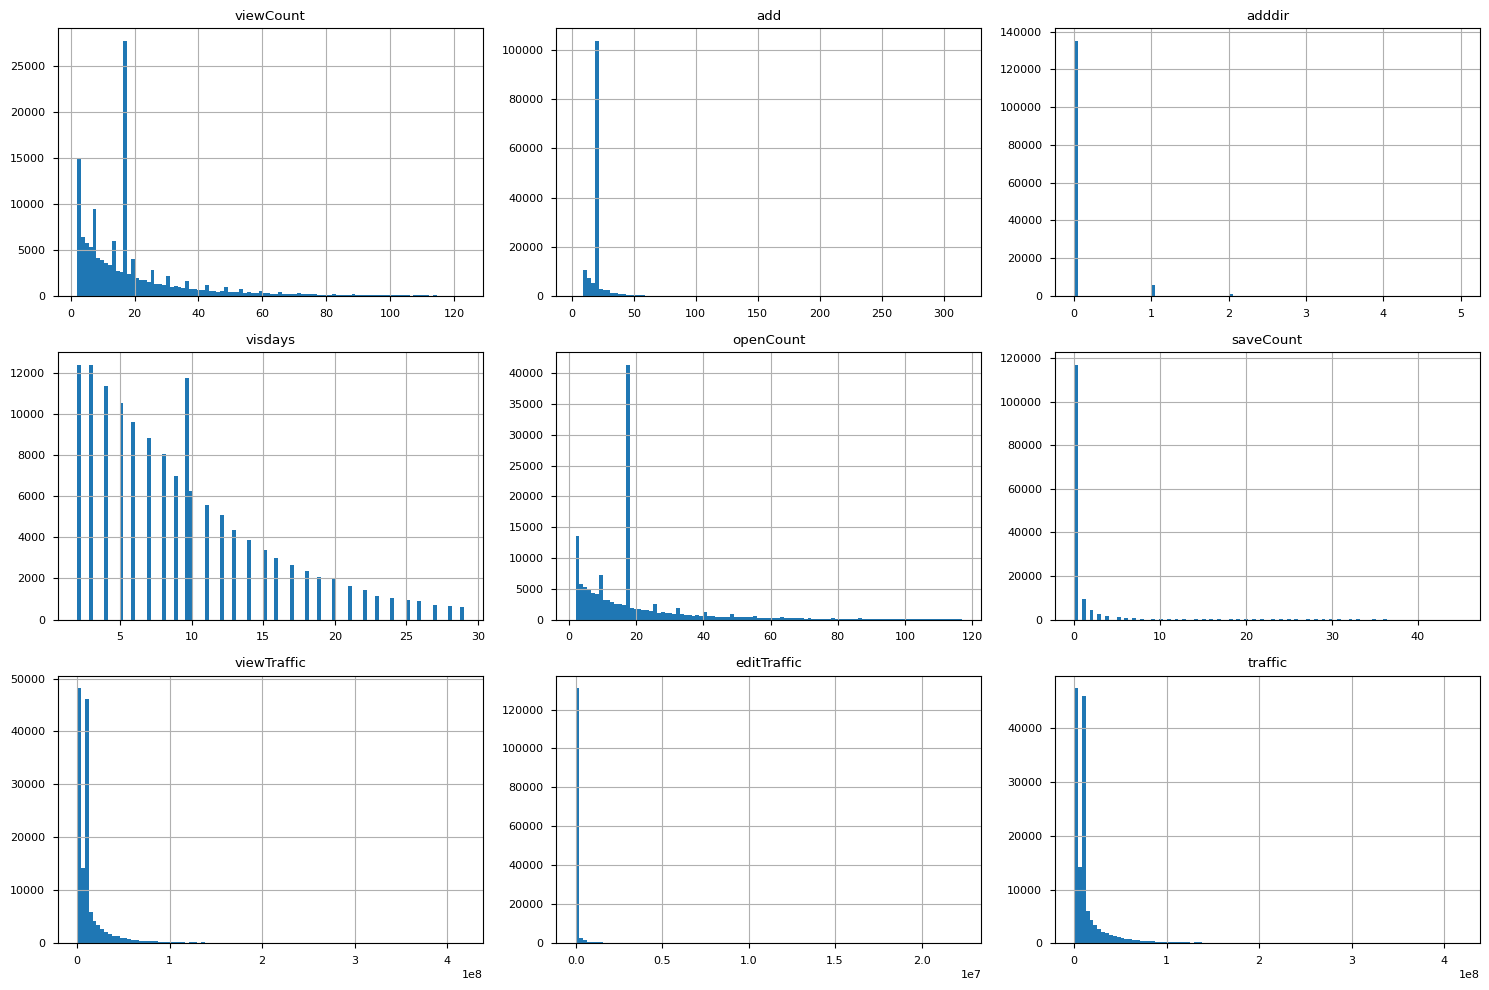

In [94]:
continuous_cols = [
    'viewCount', 'add', 'adddir', 'visdays', 'openCount', 'saveCount',
    'viewTraffic', 'editTraffic', 'traffic']

train_df[continuous_cols].hist(bins=100, figsize=(15, 10))
plt.tight_layout()

In [95]:
train_df[continuous_cols].skew()

viewCount       2.176787
add            10.802272
adddir          6.608559
visdays         1.072914
openCount       2.325799
saveCount       7.056518
viewTraffic     5.684519
editTraffic     9.426127
traffic         5.638772
dtype: float64

In [96]:
# log transformation
cols = train_df.drop(['group'], axis=1).columns
temp_transformation_df = train_df[continuous_cols].apply(lambda x : np.log(x - x.min() + 1), axis=0)
temp_transformation_df.skew()

viewCount     -0.521972
add            1.091724
adddir         4.899027
visdays       -0.523443
openCount     -0.639403
saveCount      2.984060
viewTraffic   -2.436773
editTraffic    0.628152
traffic       -1.936241
dtype: float64

In [97]:
train_df[continuous_cols] = train_df[continuous_cols].apply(lambda x : np.log(x - x.min() + 1), axis=0)
train_df[continuous_cols].skew()

viewCount     -0.521972
add            1.091724
adddir         4.899027
visdays       -0.523443
openCount     -0.639403
saveCount      2.984060
viewTraffic   -2.436773
editTraffic    0.628152
traffic       -1.936241
dtype: float64

### 3.4 스케일링

In [ ]:
# train_df[continuous_cols].max() - train_df[continuous_cols].min()

In [ ]:
# train_df_cp = train_df.copy()
# test_df_cp = test_df.copy()

In [ ]:
# train_df_cp.isnull().sum()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler().fit(train_df[continuous_cols])
# train_df[continuous_cols] = scaler.transform(train_df[continuous_cols])
# train_df[continuous_cols].max() - train_df[continuous_cols].min()

In [ ]:
# test_df[continuous_cols] = scaler.transform(test_df[continuous_cols])

In [ ]:
# train_df_cp.isnull().sum()

In [ ]:
# test_df.isnull().sum()

## 4. 모델 학습

In [98]:
train_x = train_df.drop(['group'], axis=1)
train_y = train_df['group']
test_x = test_df.drop(['group'], axis=1)
test_y = test_df['group']

print(train_x.shape, test_x.shape)
print(train_y.shape, test_y.shape)

(141660, 14) (50000, 14)
(141660,) (50000,)


In [99]:
train_x.shape[0] / train_x.shape[1]

10118.57142857143

### 4.1 모델 선택

In [ ]:
# 연속형 변수(9개) - viewCount, add, adddir, visdays, openCount, saveCount, viewTraffic, editTraffic, traffic
# 이진형 변수(5개) - freq_val_editCount_same, freq_val_shareCount_same, freq_val_searchCount_same, freq_val_move_same, freq_val_rename_same
# 전체 데이터 수 - 141660개
# 샘플 : 특징 비율 = 10118 : 1

# 연속형, 이진형 변수가 섞여있다. 전체 데이터 수는 약 14만개이며, 샘플과 특징의 비율은 10118:1이다.
# 그래서 tree 계열의 앙상블 모델을 진행한다.

### 4.2 클래스 불균형

In [100]:
train_y.value_counts()

0    136729
1      4931
Name: group, dtype: int64

In [101]:
train_y.value_counts(normalize=True)

0    0.965191
1    0.034809
Name: group, dtype: float64

In [102]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *

In [103]:
# 추가적으로 KNN을 통해 모델의 재현율을 살펴본다.
# 정확도는 매우 높지만, 재현율은 0이다.
# 이를 통해서 현재 모델의 클래스 불균형이 있다.

knn = KNN(n_neighbors=7).fit(train_x, train_y)
pred = knn.predict(test_x)
acc = accuracy_score(test_y, pred)
recall = recall_score(test_y, pred)

print('Accuracy: ', acc)
print('Recall: ', recall)

Accuracy:  0.95308
Recall:  0.0


### 4.3 모델 학습을 위한 파라미터 선언

In [ ]:
# 클래스 불균형에 대해서는 2가지 방법을 사용해서 해결한다.
# 1. class weight
# 2. Resampling
# 현재의 Train 데이터가 충분히 많기 때문에 Undersampling - NearMiss를 진행한다.

In [104]:
train_y.value_counts()

0    136729
1      4931
Name: group, dtype: int64

In [105]:
import copy
from sklearn.model_selection import ParameterGrid
from sklearn.feature_selection import *
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGB
from imblearn.under_sampling import NearMiss
from sklearn.svm import SVC

In [106]:
# (*) 현재 SVC로 진행하면, 에러가 발생한다. 그래서 이 부분을 체크해봐야 한다.
# 개선할 수 있는 부분이 현재로는 모델 하나 정도만 남은 것 같다.

class_imbalance_ratio = sum(train_y == 0) / sum(train_y == 1)

rf_grid = {
    'n_estimators': [100, 200],
    "max_depth":[3, 4, 5, 6]
}
xgb_grid = {
    'n_estimators': [100, 200],
    "max_depth":[3, 4, 5, 6],
    "learning_rate":[0.05, 0.1, 0.2]
}

# linear_grid = {
#     "C":[10**-2, 10**-1, 10**0, 10**1, 10**2],
#     "class_weight":[{0:1, 1:class_imbalance_ratio * w} for w in np.arange(0, 1.1, 0.2)],
#     "kernel":["linear"],
#     "random_state":[10, 20, 30]
# }

# rbf_grid = {
#     "C":[10**-2, 10**-1, 10**0, 10**1, 10**2],
#     "kernel":["rbf"],
#     "gamma":[10**-2, 10**-1, 10**0, 10**1, 10**2],
#     "class_weight":[{0:1, 1:class_imbalance_ratio * w} for w in np.arange(0, 1.1, 0.2)],
#     "random_state":[10, 20, 30]
# }

rf_cw_grid = copy.copy(rf_grid)
rf_cw_grid['class_weight'] = [{0:1, 1:class_imbalance_ratio * w} for w in [1, 0.9, 0.7, 0.5, 0.3]]

xgb_cw_grid = copy.copy(xgb_grid)
xgb_cw_grid['class_weight'] = [{0:1, 1:class_imbalance_ratio * w} for w in [1, 0.9, 0.7, 0.5, 0.3]]

rf_grid = ParameterGrid(rf_grid)
rf_cw_grid = ParameterGrid(rf_cw_grid)

xgb_grid = ParameterGrid(xgb_grid)
xgb_cw_grid = ParameterGrid(xgb_cw_grid)

# linear_grid = ParameterGrid(linear_grid)
# rbf_grid = ParameterGrid(rbf_grid)

params = {
    RFC: rf_grid,
    XGB: xgb_grid
}

# params_cw = {
#     RFC: rf_cw_grid,
#     XGB: xgb_cw_grid,
#     SVC: linear_grid,
#     SVC: rbf_grid
# }

params_cw = {
    RFC: rf_cw_grid,
    XGB: xgb_cw_grid,
}

### 4.4 모델 학습

In [107]:
train_x.describe()

,viewCount,add,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,traffic,freq_val_editCount_same,freq_val_shareCount_same,freq_val_searchCount_same,freq_val_move_same,freq_val_rename_same
count,141660.000000,141660.000000,141660.000000,141660.000000,141660.000000,141660.000000,141660.000000,141660.000000,141660.000000,141660.000000,141660.000000,141660.000000,141660.00000,141660.000000
mean,2.446241,2.873994,0.036513,1.790050,2.473967,0.287609,15.350113,4.179836,15.421929,0.917824,0.972928,0.948779,0.99628,0.995539
std,1.065815,0.319028,0.169891,0.861508,1.015499,0.598965,2.085526,4.948243,1.933438,0.274633,0.162293,0.220449,0.06088,0.066645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.791759,2.899832,0.000000,1.098612,1.945910,0.000000,14.541331,0.000000,14.584035,1.000000,1.000000,1.000000,1.00000,1.000000
50%,2.772589,2.899832,0.000000,1.945910,2.792067,0.000000,16.003217,0.000000,16.041352,1.000000,1.000000,1.000000,1.00000,1.000000
75%,3.044522,2.899832,0.000000,2.397895,2.944439,0.185291,16.251381,7.432552,16.277687,1.000000,1.000000,1.000000,1.00000,1.000000
max,4.804021,5.746203,1.791759,3.332205,4.753590,3.828641,19.850537,16.922160,19.850537,1.000000,1.000000,1.000000,1.00000,1.000000


In [108]:
train_x.head()

,viewCount,add,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,traffic,freq_val_editCount_same,freq_val_shareCount_same,freq_val_searchCount_same,freq_val_move_same,freq_val_rename_same
0,3.761200,3.737670,0.0,2.772589,3.761200,0.000000,18.346768,0.000000,18.346768,1,1,1,1,1
1,4.158883,3.931826,0.0,2.772589,4.158883,0.000000,18.636610,0.000000,18.636610,1,1,1,1,1
2,3.737670,2.639057,0.0,2.197225,2.792067,0.185291,16.003217,7.432552,16.041352,1,1,1,1,1
3,2.772589,2.899832,0.0,0.000000,2.772589,0.000000,18.806537,0.000000,18.806537,1,1,1,1,1
4,2.801740,2.899832,0.0,2.149078,2.792067,0.185291,16.003217,7.432552,16.041352,1,1,1,1,1


In [109]:
train_x.shape

(141660, 14)

#### 4.4.1 언더 샘플링 미적용

In [110]:
max_iter = 0
for k in range(14, 4, -3):
    for model_func in params_cw:
        for param in params_cw[model_func]:
            max_iter += 1

print(max_iter)

640


In [111]:
train_x_cp = train_x.copy()
test_x_cp = test_x.copy()

f1_score_list = []
acc_score_list = []
rec_score_list = []
prec_score_list = []
model_list = []
param_list = []

best_score = -1 # f1_score

cur = 1
for k in range(14, 4, -3):
    selector = SelectKBest(mutual_info_classif, k=k).fit(train_x_cp, train_y)
    selected_features = train_x_cp.columns[selector.get_support()]

    s_train_x_cp = train_x_cp[selected_features]
    s_test_x_cp = test_x_cp[selected_features]

    for model_func in params_cw:
        for param in params_cw[model_func]:
            model = model_func(**param).fit(s_train_x_cp, train_y)
            pred = model.predict(s_test_x_cp)

            score = f1_score(test_y, pred)
            acc_score = accuracy_score(test_y, pred)
            rec_score = recall_score(test_y, pred)
            prec_score = precision_score(test_y, pred)

            f1_score_list.append(score)
            acc_score_list.append(acc_score)
            rec_score_list.append(rec_score)
            prec_score_list.append(prec_score)
            model_list.append(model_func)
            param_list.append(param)

            if best_score < score:
                best_score = score
                best_model = model_func
                best_params = selected_features

            print(f'Current Step : {cur}/{max_iter}, Current Score : {score}/{best_score}')
            cur += 1

Current Step : 1/640, Current Score : 0.16352722003725934/0.16352722003725934
Current Step : 2/640, Current Score : 0.15542187024063356/0.16352722003725934
Current Step : 3/640, Current Score : 0.19292449996996816/0.19292449996996816
Current Step : 4/640, Current Score : 0.2010452287244338/0.2010452287244338
Current Step : 5/640, Current Score : 0.21816896429833862/0.21816896429833862
Current Step : 6/640, Current Score : 0.22191800562000144/0.22191800562000144
Current Step : 7/640, Current Score : 0.2157128344056891/0.22191800562000144
Current Step : 8/640, Current Score : 0.12472695500218435/0.22191800562000144
Current Step : 9/640, Current Score : 0.16402203403765517/0.22191800562000144
Current Step : 10/640, Current Score : 0.21408371040723984/0.22191800562000144
Current Step : 11/640, Current Score : 0.20191299790356396/0.22191800562000144
Current Step : 12/640, Current Score : 0.20303967366274095/0.22191800562000144
Current Step : 13/640, Current Score : 0.23539923645520267/0.235

In [112]:
print('Best Score: ', best_score)
print('Best Model: ', model_func)
print('Best Params: ', selected_features)

Best Score:  0.3999323867478025
Best Model:  <class 'xgboost.sklearn.XGBClassifier'>
Best Params:  Index(['visdays', 'freq_val_editCount_same', 'freq_val_shareCount_same',
       'freq_val_searchCount_same', 'freq_val_move_same'],
      dtype='object')


In [113]:
print(len(f1_score_list))
print(len(acc_score_list))
print(len(rec_score_list))
print(len(prec_score_list))
print(len(model_list))
print(len(param_list))

640
640
640
640
640
640


In [ ]:
result_df = pd.DataFrame({
    'f1_score': f1_score_list,
    'accuracy_score': acc_score_list,
    'recall_score': rec_score_list,
    'precision_score': prec_score_list,
    'model': model_list,
    'param': param_list
})

result_df.head()

,f1_score,accuracy_score,recall_score,precision_score,model,param
0,0.151007,0.54460,0.873975,0.082643,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 27.720244150559513}..."
1,0.148205,0.53446,0.873975,0.080968,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 27.720244150559513}..."
2,0.194009,0.75190,0.644368,0.114196,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 27.720244150559513}..."
3,0.189604,0.73620,0.665947,0.110538,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 27.720244150559513}..."
4,0.194382,0.77918,0.574881,0.116965,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 27.720244150559513}..."


#### 4.4.2 언더 샘플링 적용

In [ ]:
# (*) 언더 샘플링 적용할 때는 Colab의 RAM 문제를 해결해야 한다.
# 계속해서 중간에 끊긴다.

In [ ]:
# max_iter_under = 0
# for w in [0.8, 0.6, 0.4, 0.2]:
#     for k in range(14, 4, -3):
#         for model_func in params:
#             for param in params[model_func]:
#                 max_iter_under += 1

# print(max_iter_under)

In [ ]:
# from imblearn.under_sampling import NearMiss

# train_x_cp = train_x.copy()
# test_x_cp = test_x.copy()

# best_score_under = -1
# cur_under = 1

# for w in [0.8, 0.6, 0.4, 0.2]:
#     sampling_strategy = {
#         0:train_y.value_counts().iloc[-1] * class_imbalance_ratio * w,
#         1:train_y.value_counts().iloc[-1]
#     }

#     under_model = NearMiss(
#         sampling_strategy=sampling_strategy,
#         version=2,
#         n_neighbors=3)

#     u_train_x, u_train_y = under_model.fit_resample(train_x_cp, train_y)
#     u_train_x = pd.DataFrame(u_train_x, columns=u_train_x.columns)

#     for k in range(14, 4, -3):
#         selector = SelectKBest(mutual_info_classif, k=k).fit(u_train_x, u_train_y)
#         selected_features = u_train_x.columns[selector.get_support()]

#         s_train_x_cp = u_train_x[selected_features]
#         s_test_x_cp = test_x_cp[selected_features]

#         for model_func in params:
#             for param in params[model_func]:
#                 model = model_func(**param).fit(s_train_x_cp, u_train_y)
#                 pred = model.predict(s_test_x_cp)
#                 score = f1_score(test_y, pred)

#                 if best_score_under < score:
#                     best_score_under = score
#                     best_model_under = model_func
#                     best_params_under = selected_features

#                 print(f'Current Step : {cur_under}/{max_iter_under}, Current Score : {score}/{best_score_under}')
#                 cur_under += 1

### 4.5 모델 선정

In [ ]:
# 결제할만한 사람을 예측하는 것이 중요한 상황이다.
# 그래서 모델을 선정하는데 있어서 Recall을 우선적으로 고려한다.
# 단, Recall 만을 고려해서 모델을 선택하지 않고, Accuracy가 어느 정도 보장되는 모델을 선택해야 한다.

In [116]:
fpath = '/content/drive/MyDrive/Data Analysis/Payment Prediction/pred_result.csv'
pred_result_df = pd.read_csv(fpath)
pred_result_df.head()

,f1_score,accuracy_score,recall_score,precision_score,model,param,log_transformation_apply,min_max_scale_apply
0,0.151007,0.54460,0.873975,0.082643,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 27.720244150559513}...",1,0
1,0.148205,0.53446,0.873975,0.080968,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 27.720244150559513}...",1,0
2,0.194009,0.75190,0.644368,0.114196,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 27.720244150559513}...",1,0
3,0.189604,0.73620,0.665947,0.110538,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 27.720244150559513}...",1,0
4,0.194382,0.77918,0.574881,0.116965,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 27.720244150559513}...",1,0


In [117]:
model_list = pred_result_df['model'].value_counts().index
print(model_list)

Index(['<class 'xgboost.sklearn.XGBClassifier'>', '<class 'sklearn.ensemble._forest.RandomForestClassifier'>'], dtype='object')


In [118]:
model_list[0]

"<class 'xgboost.sklearn.XGBClassifier'>"

#### 4.5.1 XGB Classifier 학습 결과

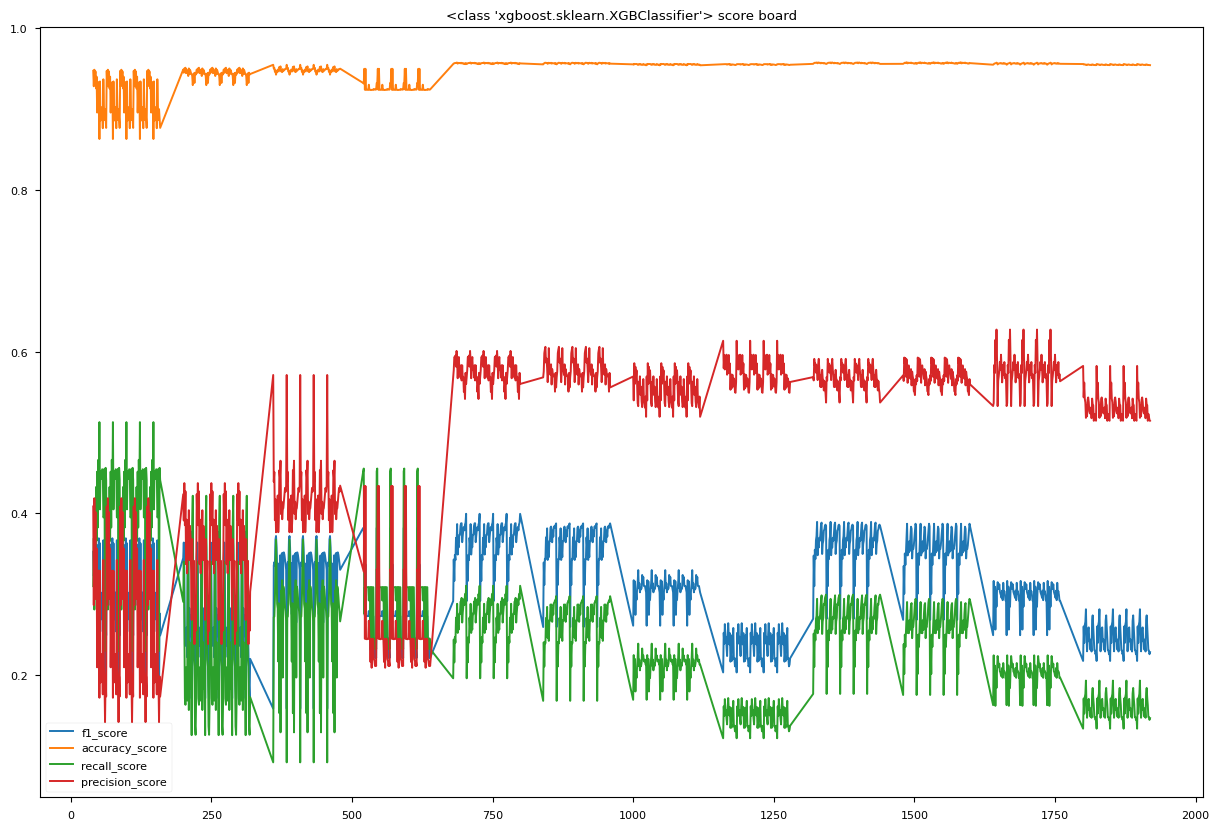

In [119]:
# XGB는 Accuracy만 높다. 현재 우리가 원하는 Recall Score는 계속해서 낮다.
score_list = ['f1_score', 'accuracy_score', 'recall_score', 'precision_score']
pred_result_df.loc[pred_result_df['model'] == model_list[0], score_list].plot(figsize=(15, 10))
plt.title(f'{model_list[0]} score board')
plt.legend()

#### 4.5.2 Random Forest Classifier 학습 결과

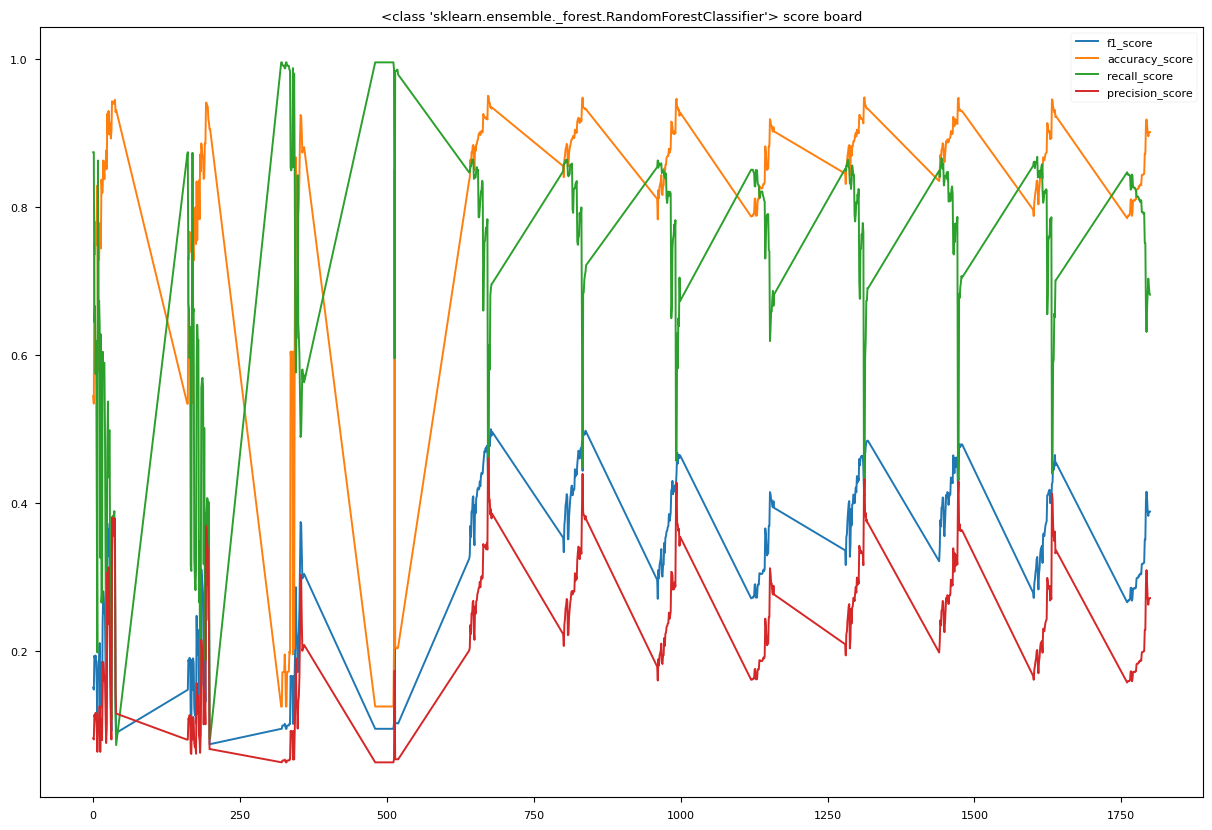

In [120]:
# Random Forest는 XGB와는 다르게 Accuracy가 낮아지면서 Recall이 높아지기도 한다.
# 그래서 결제 예측을 위한 모델로는 Random Forest를 사용한다.
score_list = ['f1_score', 'accuracy_score', 'recall_score', 'precision_score']
result_df.loc[result_df['model'] == model_list[1], score_list].plot(figsize=(15, 10))
plt.title(f'{model_list[1]} score board')
plt.legend()

In [124]:
# Recall Score를 일정 수치 이상으로 설정하면, Accuracy가 급격히 떨어지기에 0.86을 기준으로 설정했다.
acc_cond = pred_result_df['accuracy_score'] > 0.86
rec_cond = pred_result_df['recall_score'] > 0.86

pred_result_df[acc_cond & rec_cond]

,f1_score,accuracy_score,recall_score,precision_score,model,param,log_transformation_apply,min_max_scale_apply
645,0.387953,0.87278,0.864123,0.250124,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 26.635195639478294}...",0,1
646,0.407232,0.88262,0.864123,0.266385,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 26.635195639478294}...",0,1
647,0.409308,0.88374,0.863266,0.268247,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 26.635195639478294}...",0,1
804,0.396926,0.87760,0.863266,0.257710,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 26.635195639478294}...",0,1
805,0.402042,0.88054,0.860694,0.262278,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 26.635195639478294}...",0,1
806,0.412240,0.88514,0.863266,0.270772,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 26.635195639478294}...",0,1
807,0.408883,0.88342,0.864123,0.267800,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 26.635195639478294}...",0,1
1284,0.378008,0.86922,0.862039,0.242081,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 27.755799755799757}...",0,0
1285,0.388298,0.87454,0.863774,0.250440,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 27.755799755799757}...",0,0
1444,0.394155,0.87728,0.865944,0.255145,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 27.755799755799757}...",0,0


### 4.6 모델 선정 결론
결제할 사용자를 예측하는 모델을 만드는 것이 주된 목적이다. 그래서 모델 선택의 주요 지표로 **Recall(재현율)**을 활용한다. 다만, 무조건 재현율이 높은 모델을 선택하지 않는다. 모델은 **RandomForest**를 선택한다. 학습 결과를 살펴보면, 정확도가 급격하게 낮아진다. 그래서 재현율과 정확도 지표를 적절히 보유한 모델을 선택한다. 그래서 재현율과 정확도 모두 0.86 보다 큰 결과를 가진 모델을 선택했다.

In [125]:
# 경우에 따라서는 log 변환 / min max scaler 적용이 달라지게 된다.
pred_result_df[acc_cond & rec_cond]

,f1_score,accuracy_score,recall_score,precision_score,model,param,log_transformation_apply,min_max_scale_apply
645,0.387953,0.87278,0.864123,0.250124,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 26.635195639478294}...",0,1
646,0.407232,0.88262,0.864123,0.266385,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 26.635195639478294}...",0,1
647,0.409308,0.88374,0.863266,0.268247,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 26.635195639478294}...",0,1
804,0.396926,0.87760,0.863266,0.257710,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 26.635195639478294}...",0,1
805,0.402042,0.88054,0.860694,0.262278,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 26.635195639478294}...",0,1
806,0.412240,0.88514,0.863266,0.270772,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 26.635195639478294}...",0,1
807,0.408883,0.88342,0.864123,0.267800,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 26.635195639478294}...",0,1
1284,0.378008,0.86922,0.862039,0.242081,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 27.755799755799757}...",0,0
1285,0.388298,0.87454,0.863774,0.250440,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 27.755799755799757}...",0,0
1444,0.394155,0.87728,0.865944,0.255145,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': {0: 1, 1: 27.755799755799757}...",0,0
